# Deep Learning Mid Module Practical Assessment Assignment
# Submitted By: Ayeni Oluwakayode Tomokish

# Part1 : Platform Preparation, Reading Data and Feature Engineering

(A) Setup the Enviroenment

In [ ]:
# Import the necessary libraries: tensorflow or keras for Neural Networks
# Import matplotlib for Visualising the images, and numpy for numerical operations

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

(B) Load the Fashion MNIST Datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Check the Shape of the Data

In [ ]:
print (f"Training Data Shape: {x_train.shape}, Training Labels Shape: {y_train.shape}")
print (f"Testing Data Shape: {x_test.shape}, Testing Labels Shape: {x_test.shape} ")

Training Data Shape: (60000, 28, 28), Training Labels Shape: (60000,)
Testing Data Shape: (10000, 28, 28), Testing Labels Shape: (10000, 28, 28) 


In [ ]:
# Print First Few Labels of the MNIST Data

In [ ]:
print("First 1o Labels:", y_train[:10])

First 1o Labels: [9 0 0 3 0 2 7 2 5 5]


In [ ]:
# Class Names for Fashion MNIST Labels

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat','Sandal','Shirt',
 'Sneaker', 'Bag','Ankle-boot']

In [ ]:
# Validate the Label Values Ranges

In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
# Print the first 10 Images

In [ ]:
for i in range (10):
  label_index = y_train[i]
  print(f"image{i+1}: {[label_index]}")

image1: [9]
image2: [0]
image3: [0]
image4: [3]
image5: [0]
image6: [2]
image7: [7]
image8: [2]
image9: [5]
image10: [5]


In [ ]:
# Display a Sample of the Images.

# Visualise the Data Before Normalization

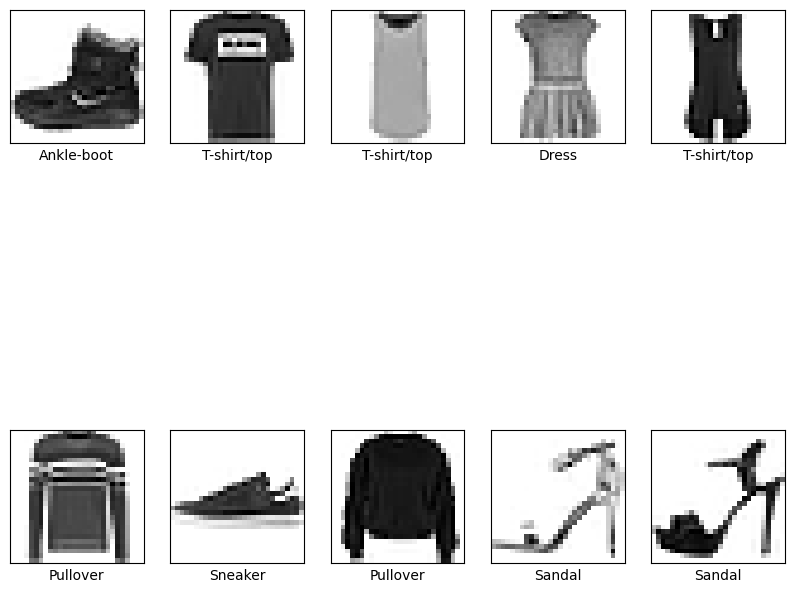

In [ ]:
#def plot_images(images,labels):
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap = plt.cm.binary )
    plt.xlabel(class_names[y_train[i]])
plt.show()
    #plt.imshow(images[i].reshape(28, 28), cmap='gray')
    #plt.title(labels[i])
    #plt.axis('off')
    #plt.xlabel(class_names[y_train[i]])
    #plt.show()
#plot_images(x_train, y_train)

# Data Preprocessing

In [ ]:
# Normalize the Images to a range of [0, 1] for Better Model Performance

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape the Data for Model Compatibility

In [ ]:
# Reshape the 28 by 28 ImageS into a 784 Dimensional Vector

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))

# Visualise the Image After Normalisation and Reshape.

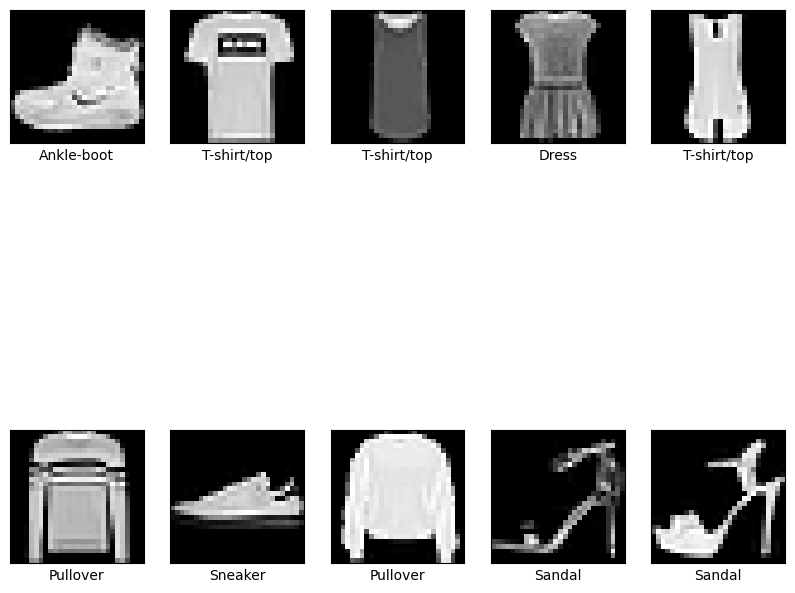

In [ ]:

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()




# Part 2: Define the Models

In [ ]:
# Import TensoFlow libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Train With SGD Optimiser and Sigmoid Activation Function.

In [ ]:
# Define the Neural Network Model

# Train the Model and Apply Batch Normalization

In [ ]:
model = Sequential()
model.add(Input(shape=(28*28,))) # Input Layer
model.add(Dense(128, activation ='sigmoid')), # Hidden Layer 1
model.add(BatchNormalization()) # Batch Normalization Layer
model.add(Dense(64, activation = 'sigmoid')), # Hidden Layer 2
model.add(BatchNormalization()) # Batch Normalization Layer
model.add(Dense(10, activation = 'softmax'))  # Output layers


# Compile the Model

# Apply Hyperparameter Tuning with the Optimizer

In [ ]:
optimizer = SGD(learning_rate=0.01, momentum=0.9) # Adjust the learning rate
model.compile(optimizer = 'sgd', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

# Train the Model

Apply Early Stopping to Save Training Time and Prevent Potential Overfitting

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Increase the Epochs to 50

In [ ]:
# Train the Model with epochs = 100, and batch size = 1000

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size = 1000, validation_data = (x_test, y_test), callbacks=[early_stopping]) # Increase epochs to 50

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4720 - loss: 1.5339 - val_accuracy: 0.1003 - val_loss: 2.3014
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7442 - loss: 0.7526 - val_accuracy: 0.3436 - val_loss: 2.0746
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7775 - loss: 0.6592 - val_accuracy: 0.5031 - val_loss: 1.7959
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7919 - loss: 0.6116 - val_accuracy: 0.7037 - val_loss: 1.4592
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8048 - loss: 0.5751 - val_accuracy: 0.7771 - val_loss: 1.1227
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8075 - loss: 0.5601 - val_accuracy: 0.7975 - val_loss: 0.8633
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8141 - loss: 0.5436 - val_accuracy: 0.8059 - val_loss: 0.6993
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8199 - loss: 0.5278 - val_accuracy: 0.

# Evaluate The Model Output

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f'Train Loss: {train_loss}, Train Accuracy:{train_accuracy}')
print(f'Test Loss: {test_loss}, Test Accuracy:{test_accuracy}')

Train Loss: 0.35938146710395813, Train Accuracy:0.8743333220481873
Test Loss: 0.41646629571914673, Test Accuracy:0.8492000102996826


# Plotting Train vs Validation Accuracy and Loss

In [ ]:
# Plot the Train and Validation Loss and Accuracy to determine the performance of the model.

In [ ]:
# Plot the Training and Validation Accuracy

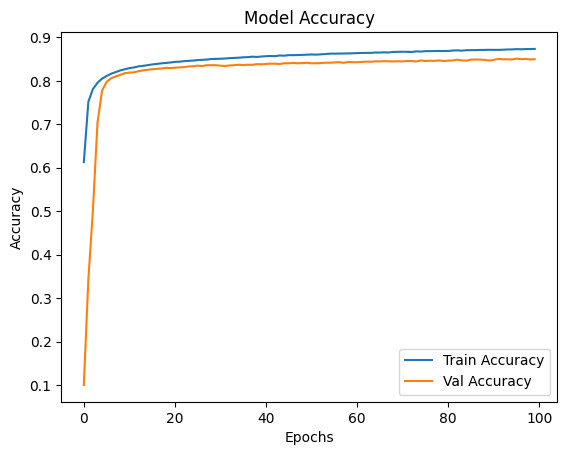

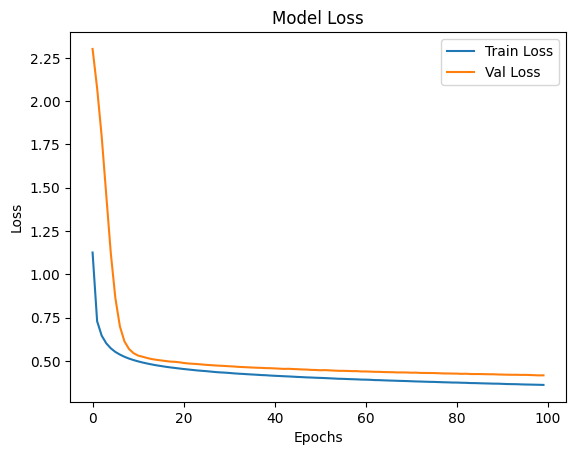

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plot the Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


# Part 3: Modify With Alternative Activation Functions - ReLU

Replace Activation Function with ReLU

# Define The Model

In [ ]:
# Define the Neural Network Model with ReLU Activation Function

# Apply Batch Normalization after the Hidden Layers

In [ ]:
model_relu = Sequential()
model_relu.add(Input(shape=(28 * 28, )))  # Input Layer
model_relu.add(Dense(128, activation = 'relu')),  # Hindden Layer 1
model_relu.add(BatchNormalization()) # add Batch Normalization
model_relu.add(Dense(64, activation = 'relu')),   # Hindden Layer 2
model_relu.add(BatchNormalization()) # add Batch Normalization
model_relu.add(Dense(10, activation = 'softmax')) # Output Layer

# Compile the Model

# Apply Hyperparameter Tuning with the Optimizer

In [ ]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_relu.compile(optimizer= 'sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train The Model

Apply Early Stopping to Save Training Time and Prevent Potential Overfitting

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Increase the Epochs to 50

In [ ]:
# Train the Model starting with Epochs = 100, and Batch = 1000

In [ ]:
history_relu = model_relu.fit(x_train, y_train, epochs=100, batch_size=1000, validation_data=(x_test, y_test), callbacks=[early_stopping]) # Epochs = 50

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4654 - loss: 1.6790 - val_accuracy: 0.6043 - val_loss: 1.6326
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7538 - loss: 0.7871 - val_accuracy: 0.7195 - val_loss: 1.2514
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7878 - loss: 0.6685 - val_accuracy: 0.7616 - val_loss: 0.9724
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8082 - loss: 0.5979 - val_accuracy: 0.7872 - val_loss: 0.7900
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8160 - loss: 0.5633 - val_accuracy: 0.8019 - val_loss: 0.6741
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8246 - loss: 0.5372 - val_accuracy: 0.8103 - val_loss: 0.6065
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8262 - loss: 0.5195 - val_accuracy: 0.8147 - val_loss: 0.5635
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8336 - loss: 0.4989 - val_accuracy: 0.

# Evaluate The Model Output When Replaced With Relu

In [ ]:
train_loss_relu, train_accuracy_relu = model_relu.evaluate(x_train, y_train, verbose=0)
test_loss_relu, test_accuracy_relu = model_relu.evaluate(x_test, y_test, verbose=0)

print(f'ReLU Train Loss: {train_loss_relu}, Train Accuracy: {train_accuracy_relu}')
print(f'ReLU Test Loss: {test_loss_relu}, Test Accuracy: {test_accuracy_relu}')

ReLU Train Loss: 0.2624038755893707, Train Accuracy: 0.9072333574295044
ReLU Test Loss: 0.36163339018821716, Test Accuracy: 0.8725000023841858


# Plotting Train vs Validation Accuracy and Loss When Replaced With ReLU

In [ ]:
# Plot the Training and Validation Accuracy when testing with ReLU

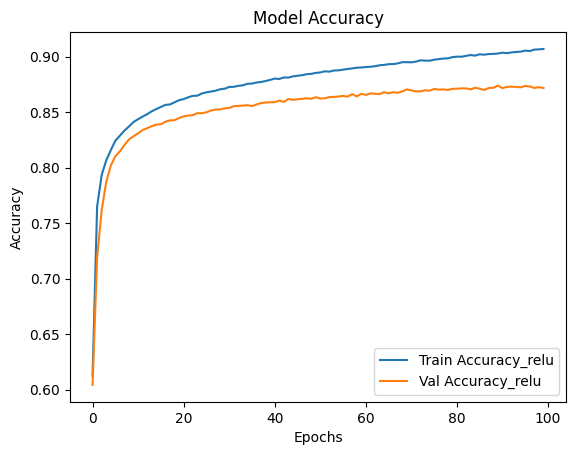

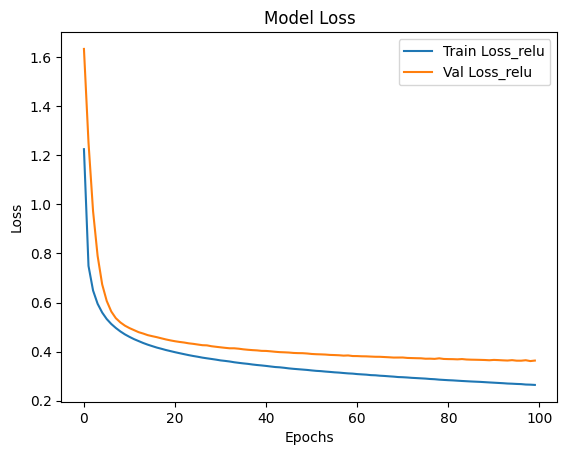

In [ ]:
plt.plot(history_relu.history['accuracy'], label='Train Accuracy_relu')
plt.plot(history_relu.history['val_accuracy'], label='Val Accuracy_relu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plot the Training and Validation Loss when testing with ReLU

plt.plot(history_relu.history['loss'], label='Train Loss_relu')
plt.plot(history_relu.history['val_loss'], label='Val Loss_relu')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# When Applied With Dropout Regularization

In [ ]:
# Apply Dropout Regularization together with ReLU Activation Function to Prevent Overfitting

In [ ]:
# Add dropout libraries

In [ ]:
from tensorflow.keras.layers import Dropout

# Define The Model

In [ ]:
# Define the Neural Network Model with Dropout

# Apply Batch Normalization after the Hidden Layers

In [ ]:
model_dropout = Sequential()
model_dropout.add(Input(shape=(28 * 28, )))  # Input Layer
model_dropout.add(Dense(128, activation ='relu')) # Hidden Layer 1
model_dropout.add(BatchNormalization()) # add Batch Normalization
model_dropout.add(Dropout(0.2)) # Dropout layer
model_dropout.add(Dense(64, activation ='relu'))  # Hidden Layer 2
model_dropout.add(BatchNormalization()) # add Batch Normalization
model_dropout.add(Dropout(0.2)) # Dropout Layer
model_dropout.add(Dense(10, activation ='softmax')) # Output layer

# Compile The Model

# Apply Hyperparameter Tuning with the Optimizer

In [ ]:
optimizer = SGD(learning_rate=0.01, momentum=0.9) # adjust the learning rate
model_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train The Model

Apply Early Stopping to Save Training Time and Prevent Potential Overfitting

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Increase the Epochs to 100 for better performance

In [ ]:
# Train the Model with Epochs = 100 and Batch = 1000

In [ ]:
history_dropout = model_dropout.fit(x_train, y_train, epochs = 100, batch_size=1000, validation_data=(x_test, y_test), callbacks=[early_stopping])# Epochs=50

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4075 - loss: 1.8320 - val_accuracy: 0.6494 - val_loss: 1.5880
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6761 - loss: 0.9584 - val_accuracy: 0.7028 - val_loss: 1.2456
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7222 - loss: 0.8175 - val_accuracy: 0.7404 - val_loss: 0.9873
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7449 - loss: 0.7443 - val_accuracy: 0.7724 - val_loss: 0.8084
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7588 - loss: 0.7043 - val_accuracy: 0.7862 - val_loss: 0.6985
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7714 - loss: 0.6653 - val_accuracy: 0.7957 - val_loss: 0.6270
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7795 - loss: 0.6408 - val_accuracy: 0.8033 - val_loss: 0.5803
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7835 - loss: 0.6225 - val_accuracy: 0.

# Evaluate the Model When Used with Dropout

In [54]:
train_loss_dropout, train_accuracy_dropout = model_dropout.evaluate(x_train, y_train, verbose=0)
test_loss_dropout, test_accuracy_dropout = model_dropout.evaluate(x_test, y_test, verbose=0)

print(f'Dropout Train Loss: {train_loss_dropout}, Train Accuracy: {train_accuracy_dropout}')
print(f'Dropout Test Loss: {test_loss_dropout}, Test Accuracy: {test_accuracy_dropout}')

Dropout Train Loss: 0.3007242977619171, Train Accuracy: 0.8907833099365234
Dropout Test Loss: 0.36725738644599915, Test Accuracy: 0.868399977684021


# Plotting Train vs Validation Accuracy and Loss When Applied With Dropout

In [55]:
# Plot the Training and Validation Accuracy when using ReLU with Dropout

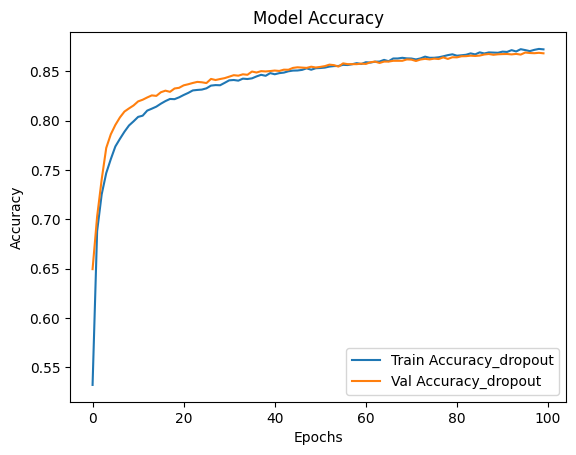

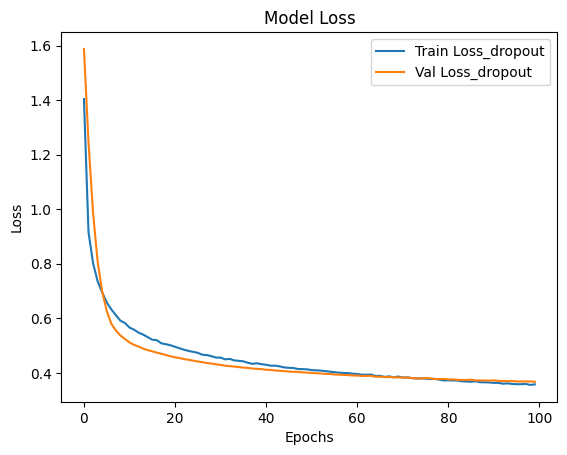

In [56]:
plt.plot(history_dropout.history['accuracy'], label='Train Accuracy_dropout')
plt.plot(history_dropout.history['val_accuracy'], label='Val Accuracy_dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plot the Training and Validation Loss when using ReLU with Dropout

plt.plot(history_dropout.history['loss'], label='Train Loss_dropout')
plt.plot(history_dropout.history['val_loss'], label='Val Loss_dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()